In [2]:
import Base
import Parser.CircuitParserCalc as cpc
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

interactive(children=(FloatSlider(value=10.0, description='r0', max=200.0, min=0.1, step=1.0), FloatSlider(val…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
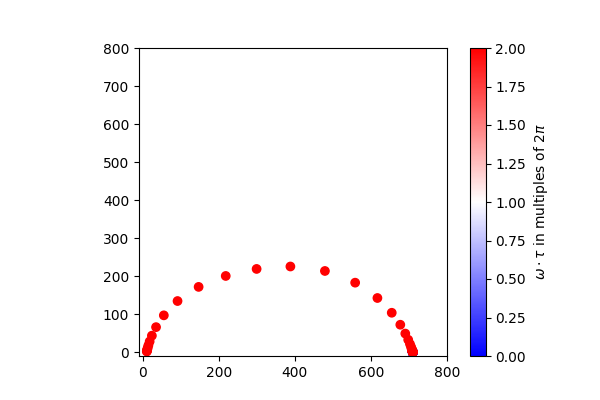

In [11]:
# set up plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.grid(True)
cb = None
fig.clear()
ax = plt.gca()
circuit = 'R0-p(R1,CPE1)-p(R2,CPE2)'
freq = np.logspace(-9, 9, 80)
param = {
        "R0": 10,
        "R1": 500,
        "R2": 200,
        "CPE1_0": 1e-9,
        "CPE1_1": 0.809,
        "CPE2_0": 1e-9,
        "CPE2_1": 0.899,
        "Ws1_R": 100,
        "Ws1_T": 10 ** 1,
        "Wss1_R": 100,
        "Wss1_T": 10 ** 1
        }
res = cpc.calc_circuit(param, circuit, freq)
scat = ax.scatter(
            res.real,
            -res.imag,
            c=freq * param["Wss1_T"] / 2 / np.pi,
            cmap='bwr',
            vmin=0,
            vmax=2
            )
fig.colorbar(scat, label=r"$\omega\cdot\tau$ in multiples of $2\pi$")
ax.set_aspect('equal')
ax.set_xlim(-10, 800)
ax.set_ylim(ax.get_xlim())
 
@widgets.interact(r0=(0.1, 200.0, 1.0), r1=(0.1, 600.0, 1.0), r2=(0.1,300,1), ws_r=(0.0, 400.0, 1.0), ws_t=(0.0, 5.0, 0.1), continuous_update=False)
def update(r0 = 10.0,r1 = 500,r2 = 200, ws_r=100.0, ws_t=1.0,alpha=0.9):
    """Remove old lines from plot and plot new one"""
    param = {
            "R0": r0,
            "R1": r1,
            "R2": r2,
            "CPE1_0": 1e-9,
            "CPE1_1": 0.809,
            "CPE2_0": 1e-9,
            "CPE2_1": 0.899,
            "Ws1_R": 100,
            "Ws1_T": 10 ** 1,
            "Wss1_R": 100,
            "Wss1_T": 10 ** 1
            }
    res = cpc.calc_circuit(param, circuit, freq)
    scat.set_offsets(np.c_[res.real,-res.imag])